In [53]:
import requests
from bs4 import BeautifulSoup
headers = {'User-Agent': 'Mozilla/5.0'}

In [54]:
url = f'https://en.wikipedia.org/wiki/Rajgad_Fort'
response = requests.get(url,headers)
soup = BeautifulSoup(response.content,"html.parser")

In [55]:
title = soup.find('h1', id='firstHeading').text
title

'Rajgad Fort'

In [56]:
soup.find_all('p',class_="")[0].text

'Rajgad (literal meaning ruling fort) is a Hill region fort situated in the Pune district of Maharashtra, India. Formerly known as Murumbdev, the fort was the first capital of the Maratha Empire under the rule of Chhatrapati Shivaji for almost 26 years, after which the capital was moved to the Raigad Fort.[1] Treasures discovered from an adjacent fort called Torna were used to completely build and fortify the Rajgad Fort.[citation needed]\n'

In [57]:
data = response.content.decode('utf-8')

In [58]:
start = data.find('<title>')
end = data.find('</title>')
print(start,end)

666 696


In [59]:
data[start+7:end]

'Rajgad Fort - Wikipedia'

In [60]:
#count number of <img> tags in data
data.count('<img')

29

In [61]:
import re
pattern = "<title.*?>.*?</title.*?>"
match_results = re.search(pattern, data, re.IGNORECASE)
title = match_results.group()
title = re.sub("<.*?>", "", title) # Remove HTML tags
print(title)

Rajgad Fort - Wikipedia


In [62]:
text = soup.get_text()
print(text)





Rajgad Fort - Wikipedia




































Jump to content







Main menu





Main menu
move to sidebar
hide



		Navigation
	


Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate





		Contribute
	


HelpLearn to editCommunity portalRecent changesUpload file





Languages

Language links are at the top of the page across from the title.



















Search











Search





























Create account

Log in








Personal tools





 Create account Log in





		Pages for logged out editors learn more



ContributionsTalk




























Contents
move to sidebar
hide




(Top)





1History



Toggle History subsection





1.1List of chronological events









2Tourism







3Gallery







4See also







5References







6External links

















Toggle the table of contents







Rajgad Fort



7 languages




Españolहिन्दीमराठीمصرىनेपाल भाषाپنجابیاردو

Edit links











Ar

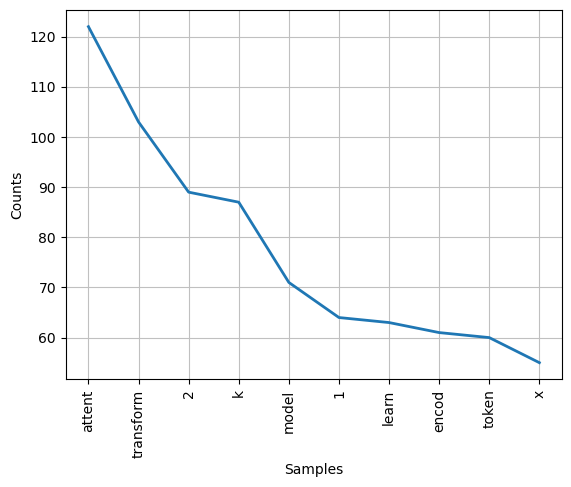

[('attent', 122), ('transform', 103), ('2', 89)]

In [72]:
import requests
import nltk
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist

# Set user agent for requests
headers = {'User-Agent': 'Mozilla/5.0'}

# Define URL and send request
url = f'https://en.wikipedia.org/wiki/Transformer_(machine_learning_model)'

response = requests.get(url, headers=headers)

# Parse HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Extract title and heading
title = soup.find('title').text
heading = soup.find('h1', id='firstHeading').text

# Retrieve all the text from the page
text = soup.get_text()
text = title + text

# Tokenize the text
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha() or word.isdigit()]

# Remove stopwords
stop_words = stopwords.words('english')
tokens = [word for word in tokens if not word in stop_words]

# Stemming
porter = PorterStemmer()
tokens = [porter.stem(word) for word in tokens]

# Find top 3 words
freq_dist = FreqDist(tokens)
freq_dist.plot(10, cumulative=False)
top_words = freq_dist.most_common(3)
top_words


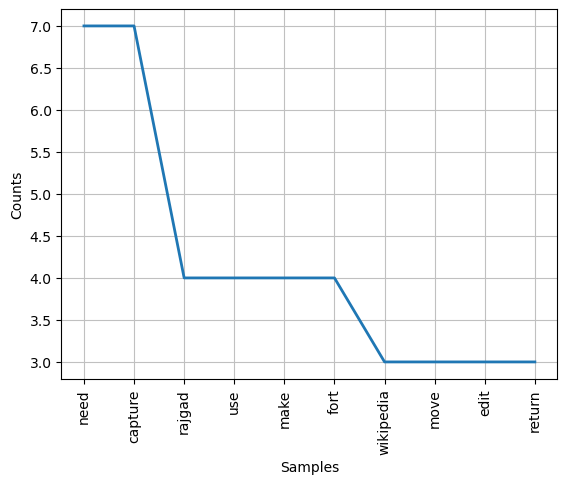

[('need', 7), ('capture', 7), ('rajgad', 4)]

In [79]:
import nltk
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import FreqDist
import spacy

# Set user agent for requests
headers = {'User-Agent': 'Mozilla/5.0'}

# Define URL and send request
url = f'https://en.wikipedia.org/wiki/Rajgad_Fort'

response = requests.get(url, headers=headers)

# Parse HTML content
soup = BeautifulSoup(response.content, "html.parser")

# Extract title and heading
title = soup.find('title').text
heading = soup.find('h1', id='firstHeading').text

# Retrieve all the text from the page
text = soup.get_text()
text = title + text

# Tokenize the text
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]

# Remove stopwords
stop_words = stopwords.words('english')
tokens = [word for word in tokens if not word in stop_words]

#find the most frequent verbs in their original form 
from nltk import pos_tag
tokens_pos = pos_tag(tokens)
verbs = [word for word, pos in tokens_pos if pos.startswith('V')]

#use lemmatization to find the root form of the verbs
wnl = nltk.WordNetLemmatizer()
verbs = [wnl.lemmatize(word, pos='v') for word in verbs]
verbs_freq = FreqDist(verbs)
verbs_freq.plot(10, cumulative=False)
verbs_freq.most_common(3)